In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Import your dataset of choice

In [2]:
# dfCore = pd.read_csv('https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/Chemical_descriptors.csv', usecols=[2,5,6] + list(range(10,218)), index_col=0)
# df1515 = pd.read_csv("Chemical_properties1515.csv")
# df1515 = pd.read_csv("https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/Chemical_descriptors1515.csv", usecols=[2,5,6] + list(range (10,218)), index_col=0)
# df1515_2 = pd.read_csv("https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/Chemical_descriptors1515.csv")
# dfID = pd.read_csv("https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/Chemical_descriptors1515.csv")
df1515 = pd.read_csv("https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/1515_for_PCA.csv")


In [3]:
import numpy as np

# df1515.replace(np.nan, 0) # fml

df1515["BCUT2D_MWHI"] = df1515["BCUT2D_MWHI"].replace(np.nan, 0)

df1515["BCUT2D_MWLOW"] = df1515["BCUT2D_MWLOW"].replace(np.nan, 0)

df1515["BCUT2D_CHGHI"] = df1515["BCUT2D_CHGHI"].replace(np.nan, 0)

df1515["BCUT2D_LOGPHI"] = df1515["BCUT2D_LOGPHI"].replace(np.nan, 0)

df1515["BCUT2D_LOGPLOW"] = df1515["BCUT2D_LOGPLOW"].replace(np.nan, 0)

df1515["BCUT2D_CHGLO"] = df1515["BCUT2D_CHGLO"].replace(np.nan, 0)

df1515["BCUT2D_MRHI"] = df1515["BCUT2D_MRHI"].replace(np.nan, 0)

df1515["BCUT2D_MRLOW"] = df1515["BCUT2D_MRLOW"].replace(np.nan, 0)

df1515["MaxPartialCharge"] = df1515["MaxPartialCharge"].replace(np.nan, 0)

df1515["MinPartialCharge"] = df1515["MinPartialCharge"].replace(np.nan, 0)

df1515["MaxAbsPartialCharge"] = df1515["MaxAbsPartialCharge"].replace(np.nan, 0)

df1515["MinAbsPartialCharge"] = df1515["MinAbsPartialCharge"].replace(np.nan, 0)

In [11]:
import plotly.express as px
import kaleido as kd
import os
import numpy as np
import plotly.io as pio
import time
start_time = time.time()

pio.kaleido.scope.default_format = "svg"


# List RDkit computed features
features = df1515.columns.values.tolist()

# Remove the Name column from the feature list
features.pop(0) 



xx = df1515.loc[:,df1515.columns].values # Get computed values from each feature
xx = StandardScaler().fit_transform(df1515[features]) # Normalize data 
df = pd.DataFrame(xx, columns = features)  # Stitch it back together
pca = PCA() # Instantiate PCA class,

components = pca.fit_transform(df[features])    # 
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

# HOW MANY COMPONENTS to render
# 25 
number_components = 58


fig = px.scatter_matrix(
    components,
    labels = labels,
    dimensions = range(number_components),  # Number of component, for the PCA set, linear behavior comes on component 5 (for the GEM) and gives descriptive (~ 80 %)
    color = df1515["mass"],  # Sets what each metabolite is colored by (<numerical feature> for gradient  & "Name" for labelling each metabolite as a  )
    title = f"Principal component analysis for metabolites in the iML1515 GEM <br><sup>{number_components} components</sup>", #  Sets title, allows some html formatting tags
 
)

# Centers title
fig.update_layout(title_x=0.5)


fig.update_traces(diagonal_visible=False)
fig.update_layout (
    width = 3840,
    height = 3160
)


# Changes the legend string
fig.update_layout( 
    legend=dict(
        title = "Metabolites", 
    )
)


# fig.add_annotation( # add a text callout with arrow
   # text= "big boi!", x="NADH", arrowhead=1, showarrow=True
# )

# Write_png() requires kaleido

print("Attempting to write html GLHF %s" % (time.time() - start_time))


fig.write_html(f"Plotly images\PCA_{number_components}_components_4K_MASS.html")

print("HTMl write successful %s" % (time.time() - start_time))


# print("Attempting to write image GLHF %s" % (time.time() - start_time))

# fig.write_image(f"Plotly images\PCA_{number_components}_components_5K.svg", engine = "kaleido")

# print("Image write successful %s" % (time.time() - start_time))

# print("Explained variation per principal component: {}".format(pca.explained_variance_ * 100))

Attempting to write html GLHF 0.07122063636779785
HTMl write successful 0.13383150100708008


## For testing purposes: reading only the csv with RDKit numericals

In [ ]:
# df2 = pd.read_csv("chemical_properties.csv")
# xx = df.loc[:, df2.columns].values

xx = df1515.loc[:,df1515.columns].values

In [ ]:
xx = StandardScaler().fit_transform(xx)

In [ ]:
xx.shape

(962, 58)

In [ ]:
np.mean(xx)

-4.32978224529418e-18

In [ ]:
np.mean(xx), np.std(xx)

(-4.32978224529418e-18, 1.0)

In [ ]:
feat_cols = ["feature" +str(i) for i in range(xx.shape[1])]
feat_cols_name = [df1515.columns]

In [ ]:
normalized_descriptors = pd.DataFrame(xx, columns = feat_cols_name)

In [ ]:
# 2 components 
pca_descriptors = PCA(n_components= 2)

# 4 component
# pca_descriptors = PCA(n_components= 4)

PC_descriptors = pca_descriptors.fit_transform(normalized_descriptors)

C:\Users\meide\.conda\envs\rdkit\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
pca_descriptors

PCA(n_components=2)

In [ ]:
# 2 Components
PC_df = pd.DataFrame(data= PC_descriptors, columns= ["PC1", "PC2"])

# 4 components
# principal_descriptors_df = pd.DataFrame(data= PC_descriptors, columns= ["PC1", "PC2", "PC3", "PC4"])

(-5.0, 5.0)

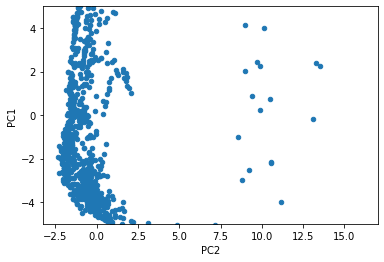

In [ ]:
#principal_descriptors_df.tail()
ax  = PC_df.plot.scatter(x = "PC2", y ="PC1")
ax.set_ylim(-5, 15)


In [ ]:
print("Explained variation per principal component: {}".format(pca_descriptors.explained_variance_))

Explained variation per principal component: [34.16290627  7.7769594 ]


In [ ]:
# a =  63.53175376 +  12.87115987 # + 10.33669742 + 9.44759513 #34.16290627 +  7.7769594
a = 34.16290627 + 7.7769594 +  2.92142128 + 2.40747469
a

47.26876164

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


x  = PC_descriptors["PC1"]
y  = PC_descriptors["PC2"]

plt.scatter(x[:1], x[:,2], c=y)


plt.show()

KeyError: 'key of type tuple not found and not a MultiIndex'

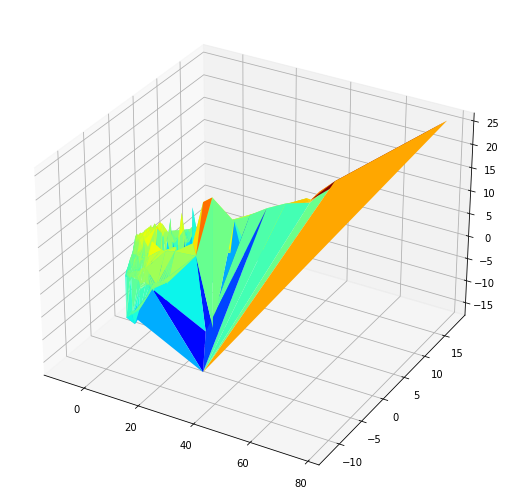

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import plotly
fig = plt.figure(figsize=(14, 9))
ax = plt.axes(projection="3d")

ax.plot_trisurf(PC_descriptorsf.PC1, PC_descriptors, PC_descriptors, cmap=cm.jet, linewidth=0.2,antialiased = True)
plt.show()

In [ ]:
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

x = dfPCA.values

# Scale large vals
x = StandardScaler().fit_transform(x)

pca_2 = PCA(n_components = 2)

X_r = pca_2.fit_transform(scale(x)).T